# Check Gaussian Fit of Filter transmission


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- Creation date : February 28th 2021
- update : May 2021
- update : October 23th 2021
- **CC : kernel anaconda3pbspzrail**

- last verification : January 4th 2022

**Purpose is to view the Gaussian Mixture decomposition of filter transmission**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import sys
import os
sys.path.append('../')
from delight.io import *
from delight.utils import *
from delight.photoz_gp import PhotozGP

In [2]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
import configparser

In [4]:
! ls tmp

delight_data	       parametersTest_17.cfg  parametersTest_4.cfg
parametersTest_10.cfg  parametersTest_18.cfg  parametersTest_5.cfg
parametersTest_11.cfg  parametersTest_19.cfg  parametersTest_6.cfg
parametersTest_12.cfg  parametersTest_1.cfg   parametersTest_7.cfg
parametersTest_13.cfg  parametersTest_20.cfg  parametersTest_8.cfg
parametersTest_14.cfg  parametersTest_21.cfg  parametersTest_9.cfg
parametersTest_15.cfg  parametersTest_2.cfg   parametersTest.cfg
parametersTest_16.cfg  parametersTest_3.cfg


## Defines file location

In [5]:
#basedelight_datapath = resource_filename('delight', '../data')
#basedelight_datapath = "../tmp/delight_indata"
basedelight_datapath = "../../rail/estimation/data"

In [6]:
filename_config="tmp/parametersTest.cfg"

In [7]:
#dir_filter="./data/FILTERS"
#dir_filter = os.path.join(basedelight_datapath,"FILTERS")
dir_filter = os.path.join(basedelight_datapath,"FILTER")

In [8]:
#filename_filters = ["lsst_u.res","lsst_g.res","lsst_r.res","lsst_i.res","lsst_z.res","lsst_y.res"]
#filename_fitfilters = ["lsst_u_gaussian_coefficients.txt", "lsst_g_gaussian_coefficients.txt",
#             "lsst_r_gaussian_coefficients.txt","lsst_i_gaussian_coefficients.txt",
#            "lsst_z_gaussian_coefficients.txt", "lsst_y_gaussian_coefficients.txt"]

In [23]:
filename_filters =["DC2LSST_u.res","DC2LSST_g.res","DC2LSST_r.res","DC2LSST_i.res","DC2LSST_z.res","DC2LSST_y.res"]

In [21]:
filename_fitfilters = ["DC2LSST_u_gaussian_coefficients.txt", "DC2LSST_g_gaussian_coefficients.txt",
             "DC2LSST_r_gaussian_coefficients.txt","DC2LSST_i_gaussian_coefficients.txt",
            "DC2LSST_z_gaussian_coefficients.txt", "DC2LSST_y_gaussian_coefficients.txt"]

## Decode parameter file

In [11]:
config = configparser.ConfigParser()
if not os.path.isfile(filename_config):
    raise Exception(filename_config +' : file not found')
config.read(filename_config)
config.sections()

['Bands', 'Templates', 'Simulation', 'Training', 'Target', 'Other']

In [12]:
numCoefs  = int(config["Bands"]["numCoefs"])
bandNames = config["Bands"]['names']
bandColors = ["b","g","r","orange","grey","k"]
#filter_dir = config ["Bands"]['bands_directory']

In [13]:
band_names=bandNames.split(" ")

In [14]:
Nbands=len(band_names)

## Plot filters and fitted filter transmission

In [19]:
! ls $dir_filter

DC2LSST_g_gaussian_coefficients.txt  DC2LSST_u_gaussian_coefficients.txt
DC2LSST_g.res			     DC2LSST_u.res
DC2LSST_i_gaussian_coefficients.txt  DC2LSST_y_gaussian_coefficients.txt
DC2LSST_i.res			     DC2LSST_y.res
DC2LSST_r_gaussian_coefficients.txt  DC2LSST_z_gaussian_coefficients.txt
DC2LSST_r.res			     DC2LSST_z.res


No handles with labels found to put in legend.
No handles with labels found to put in legend.


../../rail/estimation/data/FILTER/DC2LSST_u.res
../../rail/estimation/data/FILTER/DC2LSST_g.res
../../rail/estimation/data/FILTER/DC2LSST_r.res


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


../../rail/estimation/data/FILTER/DC2LSST_i.res
../../rail/estimation/data/FILTER/DC2LSST_z.res
../../rail/estimation/data/FILTER/DC2LSST_y.res


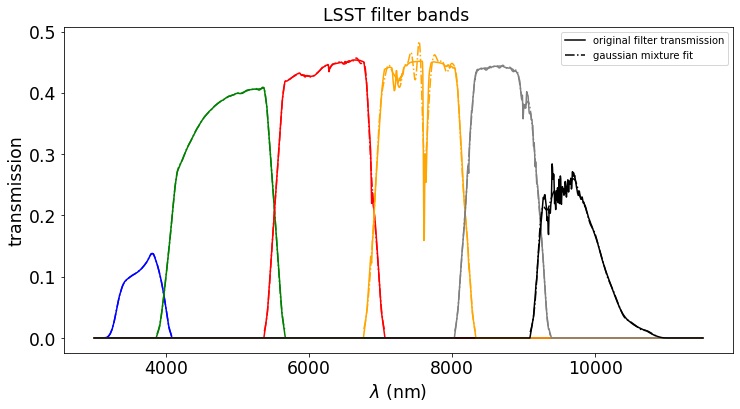

In [24]:
plt.figure(figsize=(12,6))
for idx_filter in np.arange(Nbands):
    
    # read coefficients of fits
    full_filename_fitfilter=os.path.join(dir_filter,filename_fitfilters[idx_filter])
    coefs=np.loadtxt(full_filename_fitfilter)
    
    # read filters
    full_filename_filter=os.path.join(dir_filter,filename_filters[idx_filter])
    print(full_filename_filter)
    data = np.genfromtxt(full_filename_filter)
    
    x, y = data[:, 0], data[:, 1]
    #y /= x  # divide by lambda
    # Only consider range where >1% max
    ind = np.where(y > 0.01*np.max(y))[0]
    lambdaMin, lambdaMax = x[ind[0]], x[ind[-1]]
    
    xf = np.linspace(lambdaMin, lambdaMax, num=1000)
    yy = 0*xf
    for i in range(numCoefs):
        yy += coefs[i, 0] * np.exp(-0.5*((coefs[i, 1] - xf)/coefs[i, 2])**2.0)
    if idx_filter==5:    
        plt.plot(x,y,"-",color=bandColors[idx_filter],label="original filter transmission")
        plt.plot(xf,yy,"-.",color=bandColors[idx_filter],label='gaussian mixture fit')
    else:
        plt.plot(x,y,"-",color=bandColors[idx_filter])
        plt.plot(xf,yy,"-.",color=bandColors[idx_filter])
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("transmission")
    plt.title("LSST filter bands ")
    plt.legend(loc="upper right")